In [30]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from pycaret.anomaly import AnomalyExperiment
from pycaret.classification import ClassificationExperiment

import os

import seaborn as sns

save_path = os.path.join(os.path.expanduser('~'), 'models', 'creditcard_anomaly')
data_path = os.path.join('..', '..', 'data', 'creditcard.csv')

### Data ingestion

In [2]:
data = pd.read_csv(data_path)
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(data.isna().values.sum()) # no nas
print(data.isnull().values.sum()) # no null

0
0


In [4]:
label = 'Class'
data[label].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Data analysis

<Axes: >

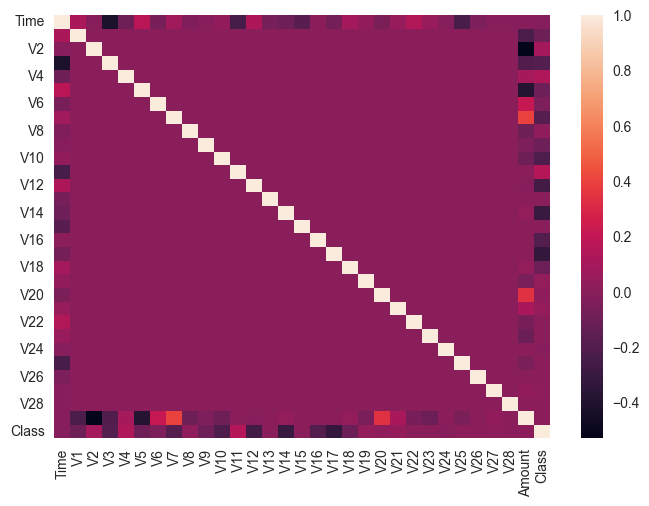

In [31]:
sns.heatmap(data.corr())

### Model building using PyCaret Anomaly Detection

In [5]:
def display_metrics(df):
    print("Accuracy score:", round(accuracy_score(df['Class'], df['Anomaly']),4))
    print("Precision score:", round(precision_score(df['Class'], df['Anomaly']),4))
    print("Recall score:", round(recall_score(df['Class'], df['Anomaly']),4))
    print("F1 score:", round(f1_score(df['Class'], df['Anomaly']),4))
    print("Confusion matrix \n")
    print(confusion_matrix(y_true=df['Class'], y_pred=df['Anomaly']))
    
    
anom_exp = AnomalyExperiment()
anom_exp.setup(data, session_id=100)

,Description,Value
0,Session id,100
1,Original data shape,"(284807, 31)"
2,Transformed data shape,"(284807, 31)"
3,Numeric features,31
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [6]:
anom_exp.models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


I try six random models from the above to try this training and display their metrics

In [7]:
# Local Outlier Factor
lof_model = anom_exp.create_model('lof')
lof_result = anom_exp.assign_model(lof_model)
# lof_pred = anom_exp.predict_model(lof_model, data=test_df)
display_metrics(lof_result)
lof_result.head()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Accuracy score: 0.9496
Precision score: 0.0132
Recall score: 0.3821
F1 score: 0.0255
Confusion matrix 

[[270262  14053]
 [   304    188]]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Anomaly,Anomaly_Score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0,1,1.509919
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0,1,1.355406
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0,1,1.989237
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0,1,1.566015
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0,1,1.836833


In [8]:
# Isolation Forest
iforest_model = anom_exp.create_model('iforest')
iforest_result = anom_exp.assign_model(iforest_model)
display_metrics(iforest_result)
iforest_result.head()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Accuracy score: 0.9512
Precision score: 0.0296
Recall score: 0.8577
F1 score: 0.0573
Confusion matrix 

[[270496  13819]
 [    70    422]]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Anomaly,Anomaly_Score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0,0,-0.073683
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0,0,-0.106820
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0,1,0.002136
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0,0,-0.071486
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0,0,-0.074190


In [9]:
# Principal Component Analysis
pca_model = anom_exp.create_model('pca')
pca_result = anom_exp.assign_model(pca_model)
display_metrics(pca_result)
pca_result.head()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Accuracy score: 0.9517
Precision score: 0.0345
Recall score: 1.0
F1 score: 0.0668
Confusion matrix 

[[270566  13749]
 [     0    492]]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Anomaly,Anomaly_Score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0,0,6902.914556
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0,0,6089.605090
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0,0,12094.054846
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0,0,9059.310296
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0,0,7310.178966


In [10]:
# Clustering-Based Local Outlier
cluster_model = anom_exp.create_model('cluster')
cluster_result = anom_exp.assign_model(cluster_model)
display_metrics(cluster_result)
cluster_result.head()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Accuracy score: 0.9488
Precision score: 0.0051
Recall score: 0.1463
F1 score: 0.0098
Confusion matrix 

[[270146  14169]
 [   420     72]]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Anomaly,Anomaly_Score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0,1,35571.741039
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0,1,35571.853777
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0,1,35571.775930
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0,1,35570.716816
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0,1,35569.726851


In [11]:
# K-Nearest Neighbors Detector
knn_model = anom_exp.create_model('knn')
knn_result = anom_exp.assign_model(knn_model)
display_metrics(knn_result)
knn_result.head()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Accuracy score: 0.9487
Precision score: 0.0046
Recall score: 0.1341
F1 score: 0.009
Confusion matrix 

[[270140  14175]
 [   426     66]]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Anomaly,Anomaly_Score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0,0,51.254292
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0,0,13.591730
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0,1,147.808258
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0,0,48.283278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0,0,35.332948


In [13]:
# Stochastic Outlier Selection failed with error 
#### MemoryError: Unable to allocate 302. GiB for an array with shape (284807, 284807) and data type float32
# so running Minimum Covariance Determinant	
mcd_model = anom_exp.create_model('mcd')
mcd_result = anom_exp.assign_model(mcd_model)
display_metrics(mcd_result)
mcd_result.head()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Accuracy score: 0.9511
Precision score: 0.0284
Recall score: 0.8232
F1 score: 0.055
Confusion matrix 

[[270479  13836]
 [    87    405]]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Anomaly,Anomaly_Score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0,0,1348.271327
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0,0,11.873732
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0,0,1533.924589
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0,0,154.984796
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0,0,714.860060


## Using classification algorithm

In [14]:
classify_exp = ClassificationExperiment()
classify_exp.setup(data, target=label, session_id=123)

classify_model = classify_exp.compare_models()

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9566,0.7969,0.9528,0.8668,0.8666,0.8706,41.6160
et,Extra Trees Classifier,0.9996,0.9595,0.7911,0.9456,0.8601,0.8599,0.8640,5.8600
xgboost,Extreme Gradient Boosting,0.9996,0.9827,0.8024,0.9371,0.8641,0.8638,0.8667,27.7880
catboost,CatBoost Classifier,0.9996,0.9799,0.8082,0.9491,0.8726,0.8724,0.8754,19.4970
lda,Linear Discriminant Analysis,0.9994,0.9085,0.7795,0.8771,0.8240,0.8237,0.8258,0.9890
lr,Logistic Regression,0.9992,0.9565,0.6483,0.8540,0.7358,0.7354,0.7431,3.5920
ada,Ada Boost Classifier,0.9992,0.9804,0.7035,0.8268,0.7582,0.7579,0.7613,20.1070
dt,Decision Tree Classifier,0.9991,0.8822,0.7648,0.7555,0.7564,0.7559,0.7578,4.3270
ridge,Ridge Classifier,0.9989,0.0000,0.4247,0.8508,0.5625,0.5620,0.5982,0.2500
gbc,Gradient Boosting Classifier,0.9989,0.6422,0.5081,0.7811,0.5929,0.5924,0.6165,91.7700


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

It appears Isolation Forest did better than Random Forest which is the best model by this automl

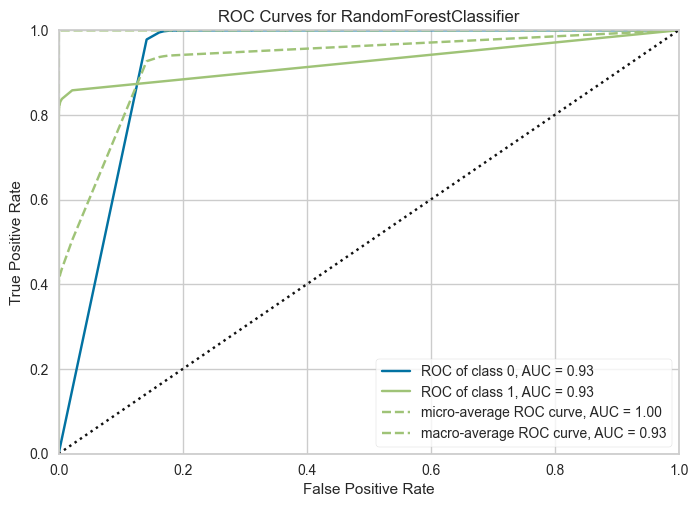

In [20]:
classify_exp.plot_model(classify_model, plot='auc')

In [23]:
classify_exp.evaluate_model(classify_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

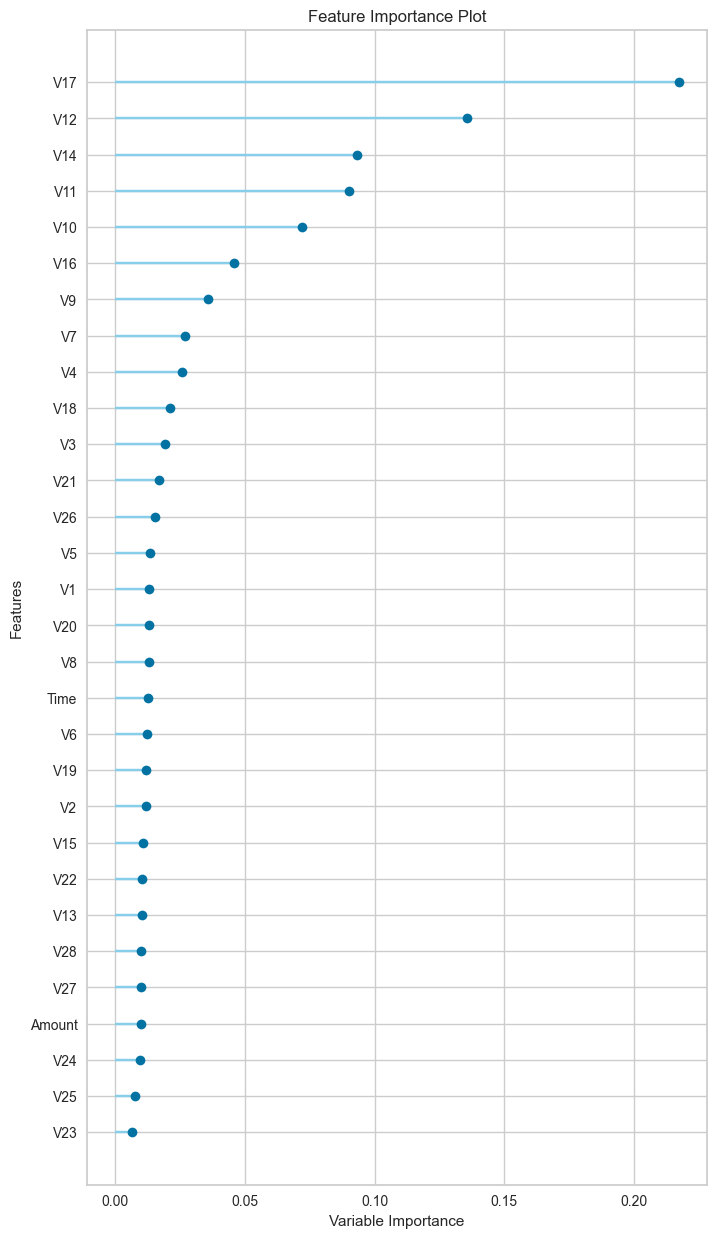

In [26]:
classify_exp.plot_model(classify_model, plot = 'feature_all')

#     * 'pipeline' - Schematic drawing of the preprocessing pipeline
#     * 'auc' - Area Under the Curve
#     * 'threshold' - Discrimination Threshold
#     * 'pr' - Precision Recall Curve
#     * 'confusion_matrix' - Confusion Matrix
#     * 'error' - Class Prediction Error
#     * 'class_report' - Classification Report
#     * 'boundary' - Decision Boundary
#     * 'rfe' - Recursive Feature Selection
#     * 'learning' - Learning Curve
#     * 'manifold' - Manifold Learning
#     * 'calibration' - Calibration Curve
#     * 'vc' - Validation Curve
#     * 'dimension' - Dimension Learning
#     * 'feature' - Feature Importance
#     * 'feature_all' - Feature Importance (All)
#     * 'parameter' - Model Hyperparameter
#     * 'lift' - Lift Curve
#     * 'gain' - Gain Chart
#     * 'tree' - Decision Tree
#     * 'ks' - KS Statistic Plot

In [27]:
# save model
if not os.path.exists(save_path):
    os.makedirs(save_path)
classify_exp.save_model(classify_model, save_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\okmic\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Time', 'V1', 'V2', 'V3', 'V4',
                                              'V5', 'V6', 'V7', 'V8', 'V9',
                                              'V10', 'V11', 'V12', 'V13', 'V14',
                                              'V15', 'V16', 'V17', 'V18', 'V19',
                                              'V20', 'V21', 'V22', 'V23', 'V24',
                                              'V25', 'V26', 'V27', 'V28',
                                              'Amount'],
                                     transformer=SimpleImputer(a...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
      

In [28]:
# load the model back up
another_exp = ClassificationExperiment()
model = another_exp.load_model(save_path)
model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\okmic\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Time', 'V1', 'V2', 'V3', 'V4',
                                             'V5', 'V6', 'V7', 'V8', 'V9',
                                             'V10', 'V11', 'V12', 'V13', 'V14',
                                             'V15', 'V16', 'V17', 'V18', 'V19',
                                             'V20', 'V21', 'V22', 'V23', 'V24',
                                             'V25', 'V26', 'V27', 'V28',
                                             'Amount'],
                                    transformer=SimpleImputer(a...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

## Conclusion

IsolationForest shows a recall of 85%%  
Randomforect has a recall of 79%.  
Quadratic Discriminant Analysis	shows 87% recall.  

I believe PCA showing is recall of 100% is due to the data having been dimensionality reduced with PCA hence, a form of look-ahead bias exist in using PCA for training.

For this project, recall is more important than precision or accuracy because I want to correctly predict more percentage of actual frauds.